In [1]:
# Victor Zavala and Leo Gonzalez
# UW-Madison, 2024
# sample average approximation example

import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [2]:
## define function to minimize

def myfun(u, X):
    phi = (u-X)**2      #-u*np.exp(0.5*X)
    return np.mean(phi)

In [3]:
## general info

u0 = 1                          # initial guess
alp = 5e-2                      # alpha corresponding to confidence level 0.95
z = norm.isf(1-alp/2, 0, 1)     # quantile Q(1-alp/2 for N(0, 1))
z = np.array([z, -z])
B = 10                          # Batch size for bounds

In [4]:
## try different sample sizes
S = np.array([1, 10, 50, 500, 1000, 5000, 10000])

uc = np.zeros(len(S))
E = np.zeros(len(S))

mub = np.zeros(len(S))
sub = np.zeros(len(S))
lub = np.zeros((len(S), 2))

mlb = np.zeros(len(S))
slb = np.zeros(len(S))
llb = np.zeros((len(S), 2))

mulb = np.zeros(len(S))
sulb = np.zeros(len(S))
lulb = np.zeros((len(S), 2))

Eub = np.zeros(B)
Elb = np.zeros(B)
ulb = np.zeros(B)

for k, s in enumerate(S):
    # generate scenarios for random variable
    mu = 1
    sig = 10
    X = np.random.normal(mu, sig, s)

    # get candidate solution
    sol = minimize(fun = myfun,
                   x0 = u0,
                   method = 'SLSQP',
                   args = X)

    uc[k] = sol.x
    E[k] = myfun(uc[k], X)

    # obtain upper bound
    for j in range(B):
        Xs = np.random.normal(mu, sig, s)
        Eub[j] = myfun(uc[k], Xs)

    mub[k] = np.mean(Eub)
    sub[k] = np.std(Eub, ddof = 1)
    lub[k] = z*sub[k]/B**0.5

    # obtain lower bound
    for j in range(B):
        Xs = np.random.normal(mu, sig, s)
        sol = minimize(fun = myfun,
                       x0 = u0,
                       method = 'SLSQP',
                       args = Xs)
        ulb[j] = sol.x
        Elb[j] = myfun(ulb[j], Xs)

    # lower bound of optimal objective
    mlb[k] = np.mean(Elb)
    slb[k] = np.std(Elb, ddof = 1)
    llb[k] = z*slb[k]/B**0.5

    # lower bound of optimal solution
    mulb[k] = np.mean(ulb)
    sulb[k] = np.std(ulb, ddof = 1)
    lulb[k] = z*sulb[k]/B**0.5

<ipython-input-4-04c240c5f371>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uc[k] = sol.x
<ipython-input-4-04c240c5f371>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ulb[j] = sol.x


In [5]:
## analyze results

#gap
gap = np.hstack([S.reshape(-1, 1), np.abs(mub-mlb).reshape(-1, 1)])

# confidence of lower bound
conflb = np.hstack([S.reshape(-1, 1), mlb.reshape(-1, 1), llb])

# confidence of solution u
confulb = np.hstack([S.reshape(-1, 1), mulb.reshape(-1, 1), lulb])

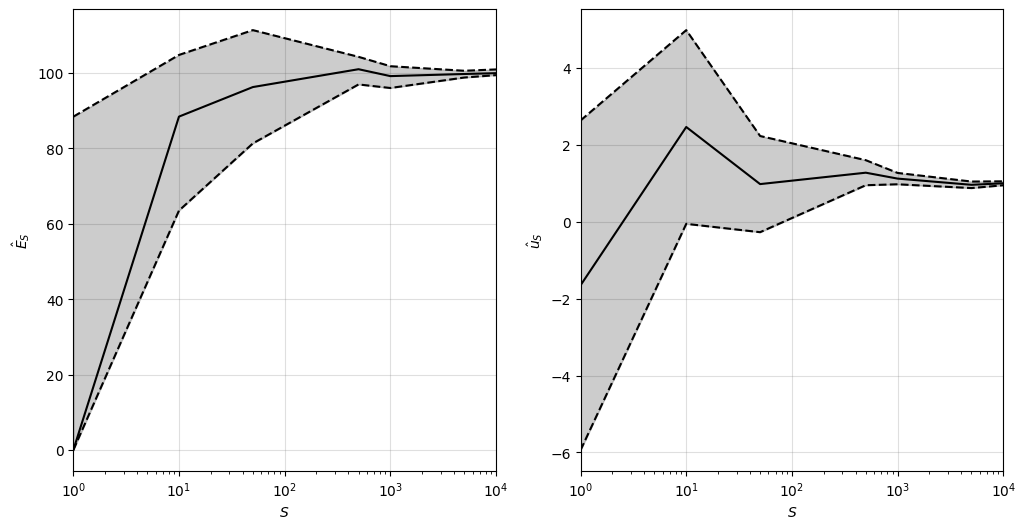

In [6]:
## visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = ([12, 6]))
ax1.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax1.set_axisbelow(True)
ax1.set_xlim(S[0], S[-1])
ax1.set_xlabel(r'$S$')
ax1.set_ylabel(r'$\hat{E}_S$')
ax1.tick_params(axis = 'both', which = 'major')
ax1.semilogx(S, mlb+llb[:, 0], 'k--', linewidth = 1.5, zorder = 3)
ax1.semilogx(S, mlb+lub[:, 1], 'k--', linewidth = 1.5, zorder = 3)
ax1.semilogx(S, mlb, 'k-', linewidth = 1.5, zorder = 3)
ax1.fill_between(S, mlb+llb[:, 0], mlb+lub[:, 1], color = 'k', alpha = 0.2)

ax2.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax2.set_axisbelow(True)
ax2.set_xlim(S[0], S[-1])
ax2.set_xlabel(r'$S$')
ax2.set_ylabel(r'$\hat{u}_S$')
ax2.tick_params(axis = 'both', which = 'major');
ax2.semilogx(S, mulb+lulb[:, 0], 'k--', linewidth = 1.5, zorder = 3)
ax2.semilogx(S, mulb+lulb[:, 1], 'k--', linewidth = 1.5, zorder = 3)
ax2.semilogx(S, mulb, 'k-', linewidth = 1.5, zorder = 3)
ax2.fill_between(S, mulb+lulb[:, 0], mulb+lulb[:, 1], color = 'k', alpha = 0.2)